In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [45]:
data=pd.read_csv('C:/Users/Rutgers/Downloads/ML_for_IoT_Final_project/data_for_weka_aw.csv')

115/115 [==============================] - 0s 512us/step


c:\Users\Rutgers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


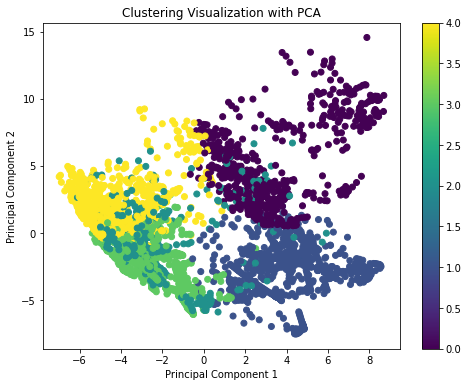

0    1
1    1
2    1
3    1
4    1
Name: Cluster_Label, dtype: int32

In [46]:
# Preprocess the data for clustering
# Dropping non-numeric and target columns
clustering_data = data.drop(['Unnamed: 0', 'activity_trimmed'], axis=1)


# Normalizing the data
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Using Autoencoder for dimensionality reduction
input_dim = clustering_data_normalized.shape[1]
encoding_dim = 7  # Reduced feature space dimension

# Building the Autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(clustering_data_normalized, clustering_data_normalized,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_split=0.2,
                verbose=0)

# Encoding the data
encoded_data = encoder.predict(clustering_data_normalized)

# Applying K-means clustering on the encoded data
n_clusters = 5  # number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(encoded_data)

# Visualizing the clustering (using PCA for 2D visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_data)
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Returning the cluster labels
cluster_labels = pd.Series(clusters, name='Cluster_Label')
cluster_labels.head()


c:\Users\Rutgers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rutgers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rutgers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Rutgers\AppData\Local\Programs\Python\Python310\lib\site-packages\skle

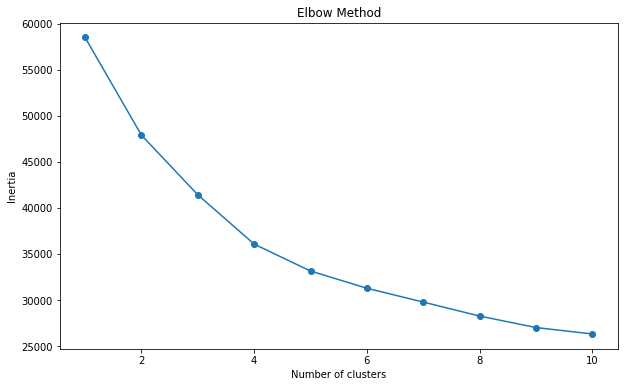

In [47]:
# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['activity_trimmed'])
encoded_labels = to_categorical(encoded_labels)


In [49]:
from sklearn.preprocessing import StandardScaler

input_features = data.drop(columns=['Unnamed: 0', 'activity_trimmed'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(input_features)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, encoded_labels, test_size=0.3, random_state=0)


In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Set up early stopping
early_stopper = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)



In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopper])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/150
64/64 [==============================] - 1s 3ms/step - loss: 1.7425 - accuracy: 0.2379 - val_loss: 1.6632 - val_accuracy: 0.3145
Epoch 2/150
64/64 [==============================] - 0s 1ms/step - loss: 1.6141 - accuracy: 0.3503 - val_loss: 1.5630 - val_accuracy: 0.3652
Epoch 3/150
64/64 [==============================] - 0s 1ms/step - loss: 1.5281 - accuracy: 0.3791 - val_loss: 1.5040 - val_accuracy: 0.3906
Epoch 4/150
64/64 [==============================] - 0s 1ms/step - loss: 1.4695 - accuracy: 0.4045 - val_loss: 1.4464 - val_accuracy: 0.3965
Epoch 5/150
64/64 [==============================] - 0s 1ms/step - loss: 1.4224 - accuracy: 0.4299 - val_loss: 1.4138 - val_accuracy: 0.4082
Epoch 6/150
64/64 [==============================] - 0s 1ms/step - loss: 1.3856 - accuracy: 0.4465 - val_loss: 1.3838 - val_accuracy: 0.4336
Epoch 7/150
64/64 [==============================] - 0s 1ms/step - loss: 1.3506 - accuracy: 0.4592 - val_loss: 1.3624 - val_accuracy: 0.4258
Epoch 8/150
6

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np

# Function for step decay learning rate schedule
def step_decay(epoch):
    initial_lr = 0.01  # Initial learning rate
    drop = 0.5         # Factor to drop the learning rate
    epochs_drop = 10.0 # Number of epochs after which to drop the learning rate
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Creating the neural network model with increased complexity
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout layer for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Another dropout layer
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning Rate Scheduler Callback
lr_scheduler = LearningRateScheduler(step_decay)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopper, lr_scheduler])


Epoch 1/100
64/64 [==============================] - 1s 3ms/step - loss: 1.6513 - accuracy: 0.2970 - val_loss: 1.4315 - val_accuracy: 0.4102 - lr: 0.0100
Epoch 2/100
64/64 [==============================] - 0s 1ms/step - loss: 1.5028 - accuracy: 0.3683 - val_loss: 1.3938 - val_accuracy: 0.4258 - lr: 0.0100
Epoch 3/100
64/64 [==============================] - 0s 1ms/step - loss: 1.4633 - accuracy: 0.3864 - val_loss: 1.3654 - val_accuracy: 0.4043 - lr: 0.0100
Epoch 4/100
64/64 [==============================] - 0s 1ms/step - loss: 1.4220 - accuracy: 0.3991 - val_loss: 1.3487 - val_accuracy: 0.4473 - lr: 0.0100
Epoch 5/100
64/64 [==============================] - 0s 1ms/step - loss: 1.4023 - accuracy: 0.4064 - val_loss: 1.3554 - val_accuracy: 0.4531 - lr: 0.0100
Epoch 6/100
64/64 [==============================] - 0s 1ms/step - loss: 1.3833 - accuracy: 0.4265 - val_loss: 1.3055 - val_accuracy: 0.4668 - lr: 0.0100
Epoch 7/100
64/64 [==============================] - 0s 1ms/step - loss: 1.3

In [54]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print out the loss and accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

from sklearn.metrics import classification_report, confusion_matrix

# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Compute precision, recall, and F1-score
class_report = classification_report(y_true_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



35/35 [==============================] - 0s 730us/step - loss: 1.0158 - accuracy: 0.5953
Test Loss: 1.0158
Test Accuracy: 59.53%
35/35 [==============================] - 0s 682us/step
Confusion Matrix:
[[121  42  15   8  29  19]
 [ 30 107  14   0  20   5]
 [ 17  22 109  14   8  15]
 [  6   0  20 140   0  21]
 [ 21  14   6   0  95  15]
 [ 25   7  21  10  20  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       234
           1       0.56      0.61      0.58       176
           2       0.59      0.59      0.59       185
           3       0.81      0.75      0.78       187
           4       0.55      0.63      0.59       151
           5       0.52      0.49      0.51       164

    accuracy                           0.60      1097
   macro avg       0.60      0.60      0.60      1097
weighted avg       0.60      0.60      0.60      1097



In [55]:
num_classes = data['activity_trimmed'].nunique()
print(f"Number of classes: {num_classes}")


Number of classes: 6


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    # ... (other layers) ...
    Dense(num_classes, activation='softmax')  # 'softmax' for multi-class classification
])

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create Tensor Datasets and Data Loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, y_train.shape[1])

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.softmax(self.output_layer(x), dim=1)
        return x

model = NeuralNetwork()

num_epochs = 10

#loss

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test data:{accuracy} %')

Epoch 1/10, Loss: 1.6413
Epoch 2/10, Loss: 1.6657
Epoch 3/10, Loss: 1.6558
Epoch 4/10, Loss: 1.5978
Epoch 5/10, Loss: 1.6298
Epoch 6/10, Loss: 1.5793
Epoch 7/10, Loss: 1.5449
Epoch 8/10, Loss: 1.5185
Epoch 9/10, Loss: 1.5829
Epoch 10/10, Loss: 1.4405


RuntimeError: The size of tensor a (32) must match the size of tensor b (6) at non-singleton dimension 1